In [15]:
import numpy as np
import matplotlib.pyplot as plt

So we are trying to unwrap a trajectory. 


The following cell contains the lattice parameters for our trajectory: a, b, & alpha
These are the lattice lengths and the angle between the lattice directions.

Lattice vectors (in 2d a 2x2 matrix) are also calculated for use later. This does not need to be done by make this code simpler.

In [16]:
a = 1
b = 1
alpha = 70 * np.pi/180

params = [a, b, alpha]

latt = np.array([[a, 0],[b*np.cos(alpha), b*np.sin(alpha)]])
latt

array([[1.        , 0.        ],
       [0.34202014, 0.93969262]])

The following function is used to conver between fractional and Cartesian coordinates

In [17]:
def convert(traj, latt):
    return np.einsum('ijk,kl->ijl', traj, latt)
     

Next, a box is defined, which will represent our simulations cell.
In other works the space that our coordinates can exist in (between 0-1 in fractional space).

In [18]:
frac_box = np.array([[[0,0],[1,0],[1,1],[0,1],[0,0]]])
cart_box = convert(frac_box, latt)

frac_box = frac_box.squeeze()
cart_box = cart_box.squeeze()
cart_box

array([[0.        , 0.        ],
       [1.        , 0.        ],
       [1.34202014, 0.93969262],
       [0.34202014, 0.93969262],
       [0.        , 0.        ]])

Here we create a dummy move in fractional space and convert it to Cartesian space.

In [19]:
frac_traj = np.array([[[0.5,0.5]],[[0.89,0.95]]])
cart_traj = convert(frac_traj, latt)

cart_traj

array([[[0.67101007, 0.46984631]],

       [[1.21491914, 0.89270799]]])

Next, we draw the simulation cell in fractional (left) and Cartesian (right) and place the above particles.

(-0.1, 1.4091211504919523)

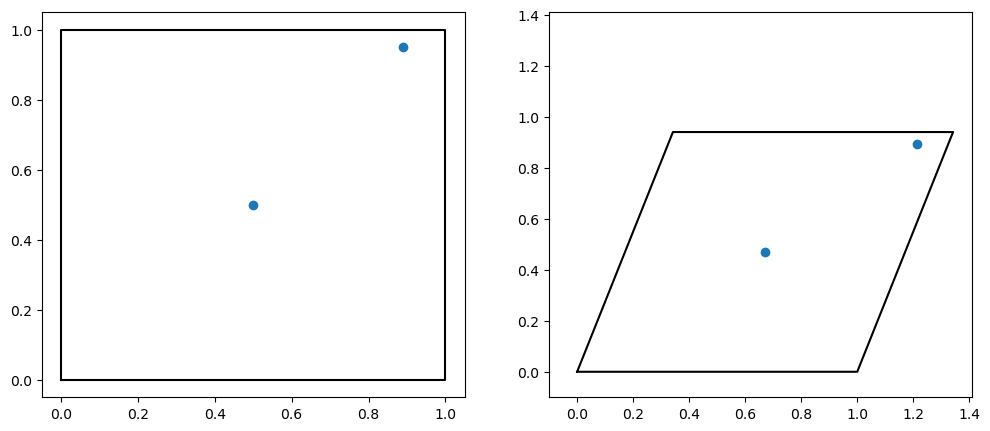

In [20]:
fig, axs = plt.subplots(1,2, figsize=(12,5))

frac = axs[0]
frac.plot(frac_box[:,0],frac_box[:,1], color='black')
frac.scatter(frac_traj[:,:,0],frac_traj[:,:,1])

cart = axs[1]
cart.plot(cart_box[:,0],cart_box[:,1], color='black')
cart.scatter(cart_traj[:,:,0],cart_traj[:,:,1])
cart_lims = np.array([cart.get_xlim(),cart.get_ylim()]).flatten()
cart.set_ylim(-0.1, cart_lims.max())
cart.set_xlim(-0.1, cart_lims.max())

Next, we calciulate the displacement vector in fractional and Cartesian space

In [21]:
frac_vector = np.diff(frac_traj, axis=0)
cart_vector = np.diff(cart_traj, axis=0)
frac_vector

array([[[0.39, 0.45]]])

And we plot this vector in both spaces

(-0.1, 1.4091211504919523)

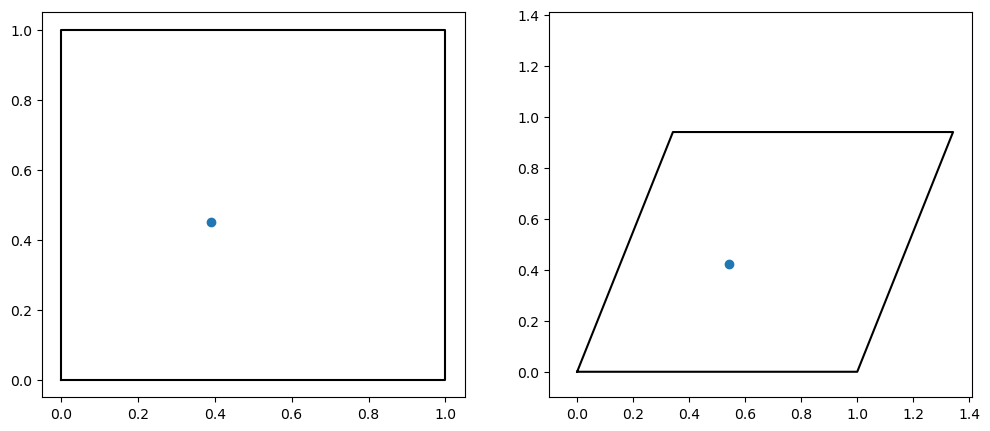

In [22]:
fig, axs = plt.subplots(1,2, figsize=(12,5))

frac = axs[0]
frac.plot(frac_box[:,0],frac_box[:,1], color='black')
frac.scatter(frac_vector[:,:,0],frac_vector[:,:,1])

cart = axs[1]
cart.plot(cart_box[:,0],cart_box[:,1], color='black')
cart.scatter(cart_vector[:,:,0],cart_vector[:,:,1])
cart_lims = np.array([cart.get_xlim(),cart.get_ylim()]).flatten()
cart.set_ylim(-0.1, cart_lims.max())
cart.set_xlim(-0.1, cart_lims.max())

We find the distance to the vector from two corners of the simulation cell

In [23]:
np.linalg.norm(cart_box[0]-cart_vector), np.linalg.norm(cart_box[3]-cart_vector)

(0.6889477994066819, 0.5548633692300188)

Here we plot the vertor in the cell with bisecting lines across the centre of the cell.

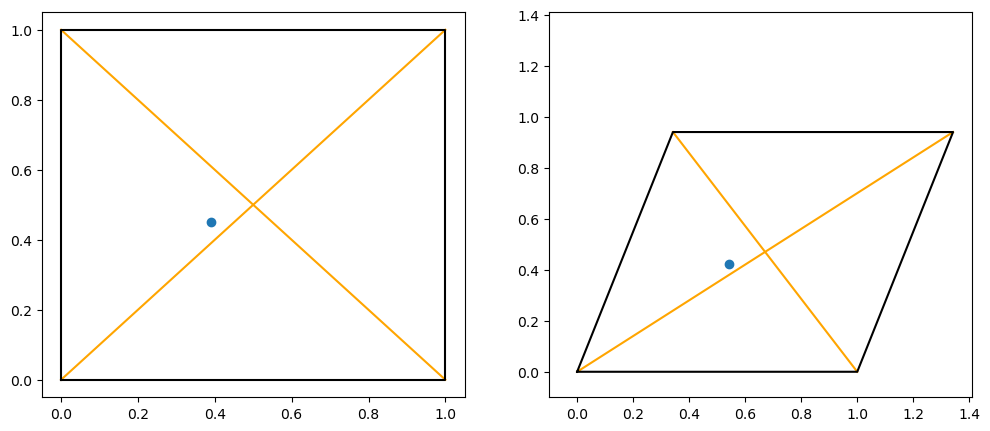

In [24]:
fig, axs = plt.subplots(1,2, figsize=(12,5))

frac = axs[0]
frac.plot(frac_box[:,0],frac_box[:,1], color='black')
frac.scatter(frac_vector[:,:,0],frac_vector[:,:,1])

cart = axs[1]
cart.plot(cart_box[:,0],cart_box[:,1], color='black')
cart.scatter(cart_vector[:,:,0],cart_vector[:,:,1])
cart_lims = np.array([cart.get_xlim(),cart.get_ylim()]).flatten()
cart.set_ylim(-0.1, cart_lims.max())
cart.set_xlim(-0.1, cart_lims.max())

frac.plot([0,1],[0,1], color='orange',zorder=-1)
frac.plot([1,0],[0,1], color='orange',zorder=-1)

cart.plot(cart_box[[0,-3],0],cart_box[[0,-3],1], color='orange',zorder=-1)
cart.plot(cart_box[[-2,1],0],cart_box[[-2,1],1], color='orange',zorder=-1)

Now we add in the perpendicular bisector of the b-direction in Cartesian space, and the equivalent line in fractional space.

[0.1710100716628344, 0.5] [0.46984631039295416, 1.3737387097273108]


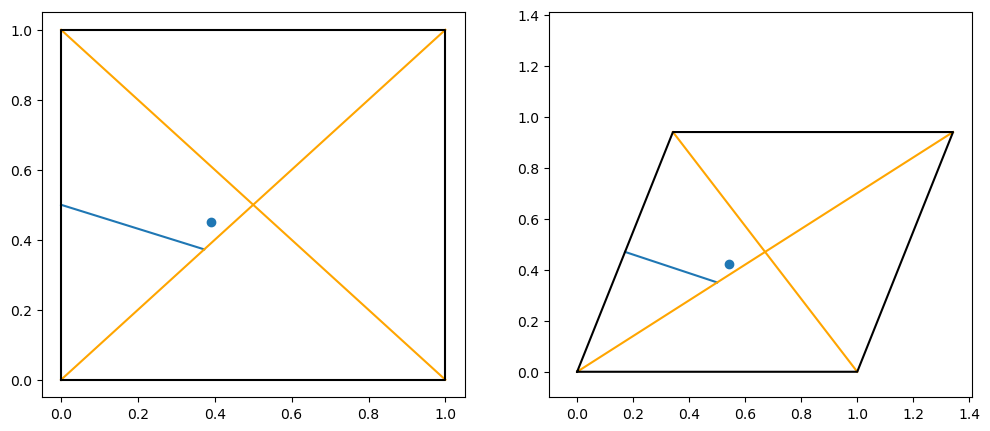

In [25]:
fig, axs = plt.subplots(1,2, figsize=(12,5))

frac = axs[0]
frac.plot(frac_box[:,0],frac_box[:,1], color='black')
frac.scatter(frac_vector[:,:,0],frac_vector[:,:,1])

cart = axs[1]
cart.plot(cart_box[:,0],cart_box[:,1], color='black')
cart.scatter(cart_vector[:,:,0],cart_vector[:,:,1])
cart_lims = np.array([cart.get_xlim(),cart.get_ylim()]).flatten()
cart.set_ylim(-0.1, cart_lims.max())
cart.set_xlim(-0.1, cart_lims.max())

frac.plot([0,1],[0,1], color='orange',zorder=-1)
frac.plot([1,0],[0,1], color='orange',zorder=-1)

cart.plot(cart_box[[0,-3],0],cart_box[[0,-3],1], color='orange',zorder=-1)
cart.plot(cart_box[[-2,1],0],cart_box[[-2,1],1], color='orange',zorder=-1)

half = np.dot([0,0.5], latt)
print([half[0], b/2],[half[1], np.tan(alpha)*b/2])
cart.plot([half[0], b/2],[half[1], np.tan(alpha/2)*b/2], zorder=-2)

inv_half = np.dot([b/2,np.tan(alpha/2)*b/2], np.linalg.inv(latt))
frac.plot([0,inv_half[0]],[0.5,inv_half[1]], zorder=-2)

Now, we propergate this to the three other bisecting lines.

0.5000000000000001 0.35010376910485486 0.7002075382097096


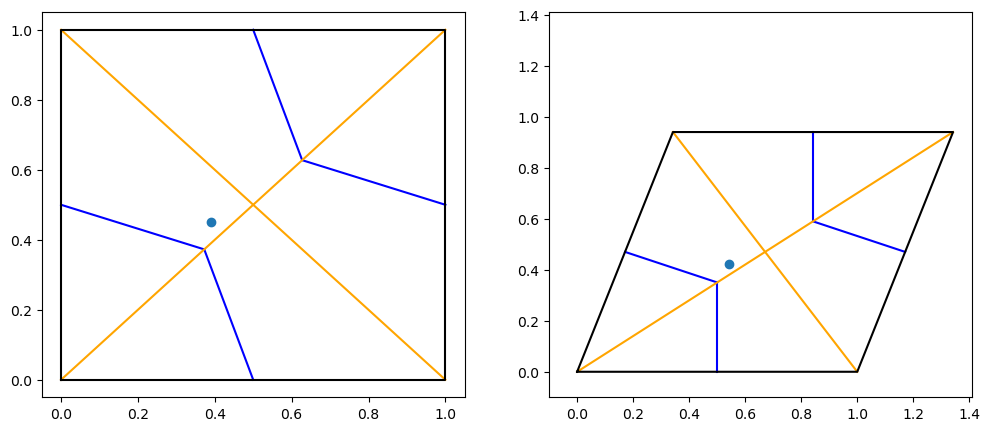

In [26]:
fig, axs = plt.subplots(1,2, figsize=(12,5))


frac = axs[0]
frac.plot(frac_box[:,0],frac_box[:,1], color='black')
frac.scatter(frac_vector[:,:,0],frac_vector[:,:,1])

cart = axs[1]
cart.plot(cart_box[:,0],cart_box[:,1], color='black')
cart.scatter(cart_vector[:,:,0],cart_vector[:,:,1])
cart_lims = np.array([cart.get_xlim(),cart.get_ylim()]).flatten()
cart.set_ylim(-0.1, cart_lims.max())
cart.set_xlim(-0.1, cart_lims.max())

frac.plot([0,1],[0,1], color='orange',zorder=-1)
frac.plot([1,0],[0,1], color='orange',zorder=-1)

cart.plot(cart_box[[0,-3],0],cart_box[[0,-3],1], color='orange',zorder=-1)
cart.plot(cart_box[[-2,1],0],cart_box[[-2,1],1], color='orange',zorder=-1)

frac_halfs = np.array([[0.5,0],[1,0.5],[0.5,1],[0,0.5]])
cart_halfs = np.array([np.dot(x, latt) for x in frac_halfs])

m = cart_box[2,1] / cart_box[2,0]
beta = np.arctan(m)
gamma = alpha - beta
x_1 = (b * np.cos(beta)) / (2 * np.cos(gamma))
y_1 = m*x_1
print(x_1,y_1, m)
cart.plot([cart_halfs[-1,0], x_1],[cart_halfs[-1,1], y_1], zorder=-2, color='blue')
cart.plot([cart_halfs[0,0], x_1],[cart_halfs[0,1], y_1], zorder=-2, color='blue')

inv_half = np.dot([x_1,y_1], np.linalg.inv(latt))
frac.plot([0,inv_half[0]],[0.5,inv_half[1]], zorder=-2, color='blue')
frac.plot([0.5,inv_half[0]],[0,inv_half[1]], zorder=-2, color='blue')

reflected = cart_box[2] - np.array([x_1,y_1])
cart.plot([cart_halfs[1,0],reflected[0]],[cart_halfs[1,1],reflected[1]], zorder=-2, color='blue')
cart.plot([cart_halfs[2,0],reflected[0]],[cart_halfs[2,1],reflected[1]], zorder=-2, color='blue')
frac_reflected = np.dot(reflected, np.linalg.inv(latt))
frac.plot([frac_halfs[1,0],frac_reflected[0]],[frac_halfs[1,1],frac_reflected[1]], zorder=-2, color='blue')
frac.plot([frac_halfs[2,0],frac_reflected[0]],[frac_halfs[2,1],frac_reflected[1]], zorder=-2, color='blue')

Below is an implimentation with numexpr

In [27]:
import numexpr as ne

In [28]:
def check_line(y2, y1, y0, x1, x2):
    res = ne.evaluate('y2>((y1-y0)/x1)*x2+y0')
    return res

y2 = frac_vector[0,0,1]
y0 = frac_halfs[3,1]
x1, y1 = np.dot([x_1,y_1], np.linalg.inv(latt))
x2 = frac_vector[0,0,0]

check_line(y2,y1,y0,x1,x2)

array(True)